In [1]:
import os
import math
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from bayes_opt import BayesianOptimization
from PIL import Image,ImageOps
import progressbar
from progressbar import *



In [2]:
x=loadmat('Input.mat')
y=loadmat('Target.mat')

x_train=x['Input']
y_train=y['Target']
print(x_train)
x_train.shape

print(x_train[5])



[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


(256, 256, 197)

In [3]:
print(x_train[5])


target_size=(224,224)
def reize_image(x_train,target_size):
    resized_images=[]
    for i in range(197):
        image=x_train[:,:,i]
        original=Image.fromarray(image)
        fit_and_resized_image= ImageOps.fit(original,target_size,Image.ANTIALIAS)
        resized_images.append(np.array(fit_and_resized_image))

    return np.array(resized_images)
        

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
 A=reize_image(x_train,target_size)
A.shape


(197, 224, 224)

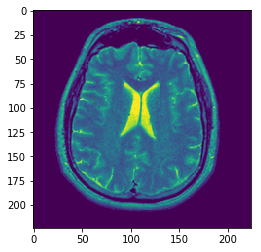

In [5]:
plt.imshow(A[5,:,:])


In [6]:
m=np.zeros(shape=(197,224,224,3))
for i in range (197):
    temp=A[i,:,:]
    m[i,:,:,0]=temp
    m[i,:,:,1]=temp
    m[i,:,:,2]=temp

m[1].shape

(224, 224, 3)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


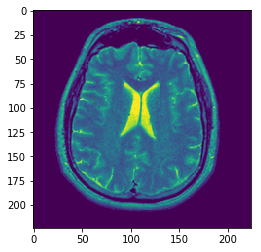

In [9]:
plt.imshow(m[5,:,:,0])

print(m[5,:,:,:])


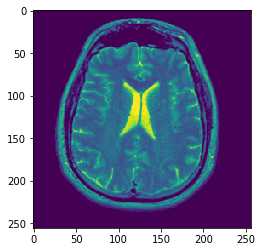

In [75]:
plt.imshow(x_train[:,:,5])

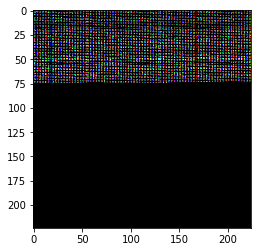

In [93]:
plt.imshow(A[:,:,:,5])

In [81]:
y=loadmat('Input_224_224_3.mat')

In [83]:
y_train=y['Input']
y_train.shape

(224, 224, 3, 197)

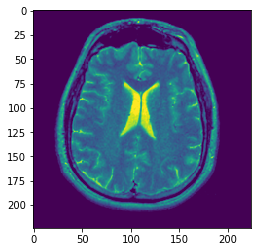

In [123]:
plt.imshow(y_train[:,:,0,5])

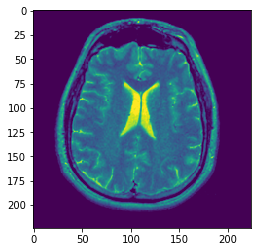

In [127]:
plt.imshow(y_train[:,:,1,5])